In [2]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создание данных для кредитного скоринга
n_clients = 1000  # Количество клиентов
data = {
    'Возраст': [random.randint(18, 70) for _ in range(n_clients)],
    'Зарплата': [random.randint(20000, 100000) for _ in range(n_clients)],
    'Количество_детей': [random.randint(0, 5) for _ in range(n_clients)],
    'Сумма_кредита': [random.randint(1000, 10000) for _ in range(n_clients)],
    'Кредитная_история': [random.choice(['Положительная', 'Отрицательная']) for _ in range(n_clients)],
    'Семейное_положение': [random.choice(['Женат/Замужем', 'Холост/Не замужем']) for _ in range(n_clients)],
    'Срок_кредита': [random.randint(12, 60) for _ in range(n_clients)],
    'Статус_работы': [random.choice(['Работает', 'Безработный', 'Студент']) for _ in range(n_clients)],
    'Кредитный_скор': [random.choice([0, 1]) for _ in range(n_clients)]  # Это целевая переменная (0 - невыдать кредит, 1 - выдать кредит)
}

# Создание DataFrame
df = pd.DataFrame(data)

# Кодирование категориальных признаков One-Hot
df = pd.get_dummies(df, columns=['Кредитная_история', 'Семейное_положение', 'Статус_работы'])

# Разделение данных на обучающий и тестовый наборы
X = df.drop('Кредитный_скор', axis=1)
y = df['Кредитный_скор']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели кредитного скоринга
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Предсказание кредитного скоринга
y_pred = model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')


Точность модели: 0.45


Матрица ошибок:
[[43 71]
 [41 45]]
ROC AUC: 0.45619135046919623
Average Precision: 0.4122370710069553
Точность модели: 0.44


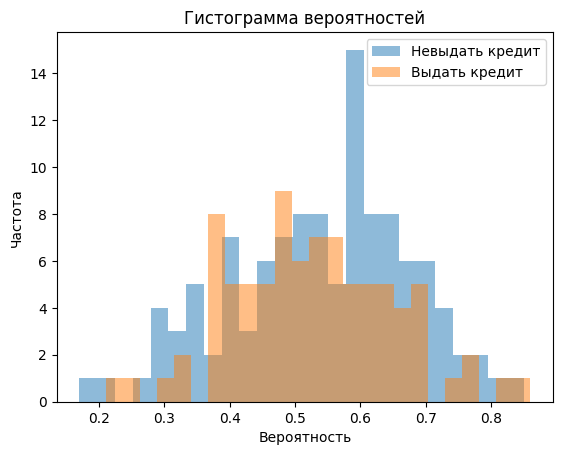

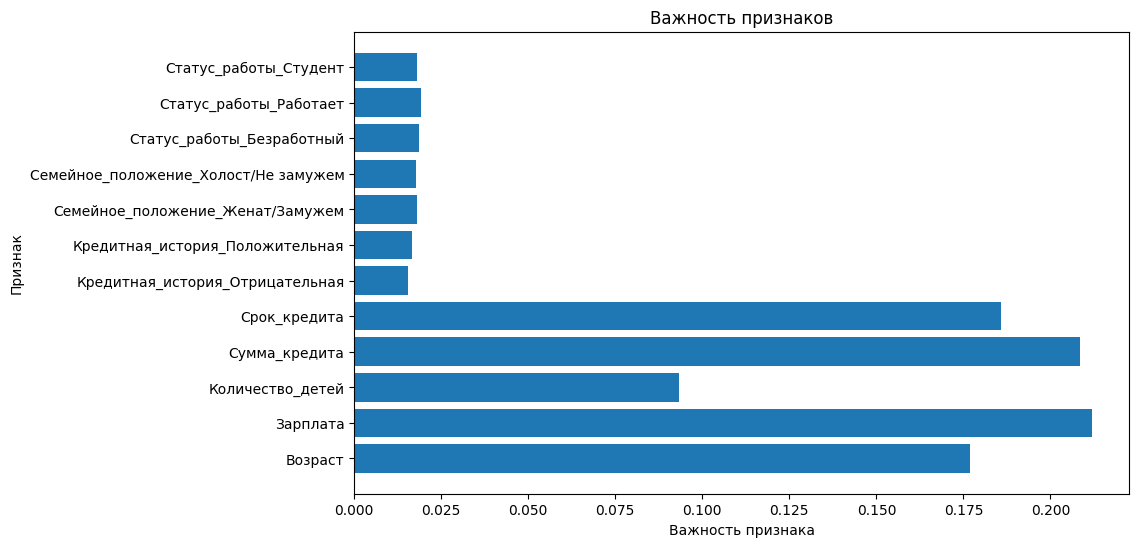

In [4]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, accuracy_score

# Создание данных для кредитного скоринга (как в вашем предыдущем коде)

# Разделение данных на обучающий и тестовый наборы
X = df.drop('Кредитный_скор', axis=1)
y = df['Кредитный_скор']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели кредитного скоринга
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Предсказание вероятностей
y_prob = model.predict_proba(X_test)[:, 1]

# Матрица ошибок (Confusion Matrix)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# ROC-кривая и AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Гистограмма вероятностей
plt.hist(y_prob[y_test == 0], bins=25, alpha=0.5, label='Невыдать кредит')
plt.hist(y_prob[y_test == 1], bins=25, alpha=0.5, label='Выдать кредит')
plt.xlabel('Вероятность')
plt.ylabel('Частота')
plt.title('Гистограмма вероятностей')
plt.legend()

# Precision-Recall кривая
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# График важности признаков (Feature Importance)
feature_importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков')

# Вывод результатов
print('Матрица ошибок:')
print(cm)
print('ROC AUC:', roc_auc)
print('Average Precision:', average_precision)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

# Сохранение данных в Excel файл
data_for_excel = pd.DataFrame({
    'Признак': features,
    'Важность признака': feature_importance
})
data_for_excel.to_excel('credit_scoring_data.xlsx', index=False)

# Отображение всех графиков
plt.show()
